# Data set 1: Greenhouse gas emission in Melbourne

## Checking data set for any errors and missing values for column

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data set into dataframe
dirty_df = pd.read_csv("City_of_Melbourne_Municipal_Greenhouse_Gas_Emissions_2013-2019.csv")
dirty_df.head(2)

,year,population,area_(km2),gdp_($m),residential_buildings_scope_1,residential_buildings_scope_2,residential_buildings_scope_3,commercial_and_institutional_buildings_and_facilities_scope_1,commercial_and_institutional_buildings_and_facilities_scope_2,commercial_and_institutional_buildings_and_facilities_scope_3,...,wastewater_generated_in_the_city__scope_2,wastewater_generated_in_the_city__scope_3,emissions_from_industrial_processes_occurring_in_the_city_boundary_scope_1,emissions_from_product_use_occurring_within_the_city_boundary_scope_2,emissions_from_livestock_scope_3,emissions_from_land_scope_1,emissions_from_aggregate_sources_and_non-co2_emission_sources_on_land_scope_2,other_scope_3_scope_3,mrep1_power_purchase_agreement_(city_of_melbourne)_scope_2,yarra_trams_power_purchase_agreement_(victorian_state_government)_scope_2
0,2019,178955,37.7 km2,70221,37913,276303,27089,170602,2714112,266089,...,7847,False,NE,NE,NE,NE,NE,NE,-44352,-21144
1,2018,169961,37.7km2,66472,37520,256112,23936,165523,2876672,268848,...,7580,False,NE,NE,NE,NE,NE,"53,702",0,0


## Deleting columns with no data

In [3]:
# remove columns with no data
dirty_df = dirty_df.drop(dirty_df.columns[[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 
                                           27, 32, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51,
                                           52, 53, 54, 55, 56, 58, 59]], axis=1)

### Cleaning the data by removing units like 'km2' and ',' from the values.

In [4]:
# bring data into required format
dirty_df['area_(km2)'] = dirty_df['area_(km2)'].str.replace('km2','')
dirty_df['railways_scope_1'] = dirty_df['railways_scope_1'].str.replace('NE', '0').str.replace(',', '')
dirty_df['waterborne_navigation_scope_1'] = dirty_df['waterborne_navigation_scope_1'].str.replace('IE', '0').str.replace(',', '')
dirty_df['waterborne_navigation_scope_3'] = dirty_df['waterborne_navigation_scope_3'].str.replace('NE', '0').str.replace(',', '')
dirty_df['aviation_scope_1'] = dirty_df['aviation_scope_1'].str.replace('NE', '0').str.replace(',', '')
dirty_df['other_scope_3_scope_3'] = dirty_df['other_scope_3_scope_3'].str.replace('NE', '0').str.replace(',', '')

# change the data types of the column to int64 from object
dirty_df[['area_(km2)', 'railways_scope_1', 'waterborne_navigation_scope_1', 'waterborne_navigation_scope_3', 'aviation_scope_1', 'other_scope_3_scope_3']] = dirty_df[['area_(km2)', 
'railways_scope_1', 'waterborne_navigation_scope_1', 'waterborne_navigation_scope_3', 'aviation_scope_1', 'other_scope_3_scope_3']].apply(pd.to_numeric)

## Correlation between columns
If the correlation is close to 1 then there is a positive relation between 2 variables, which is with increase in first variable results in increase in the second variable.
If the correlation is close to -1 then there is a negative relation between 2 variables, which is with increase in first variable results in decrease in the second variable.
If the correlation is close to zero then there is a no relation between 2 variables, we can remove such variables from the data set as they wont add any value to the analysis.

In [5]:
dirty_df.corr()

,year,population,area_(km2),gdp_($m),residential_buildings_scope_1,residential_buildings_scope_2,residential_buildings_scope_3,commercial_and_institutional_buildings_and_facilities_scope_1,commercial_and_institutional_buildings_and_facilities_scope_2,commercial_and_institutional_buildings_and_facilities_scope_3,...,railways_scope_1,railways_scope_2,railways_scope_3,waterborne_navigation_scope_1,waterborne_navigation_scope_3,aviation_scope_1,off-road_transportation_scope_1,solid_waste_generated_in_the_city_scope_2,wastewater_generated_in_the_city__scope_2,other_scope_3_scope_3
year,1.000000,0.994220,-0.866025,0.355828,-0.422843,-0.489502,-0.783846,0.986502,-0.137244,-0.763686,...,0.846281,-0.671430,-0.867768,0.880452,-0.841016,0.866025,0.442433,0.944986,0.902887,-0.623861
population,0.994220,1.000000,-0.830870,0.303583,-0.384768,-0.471469,-0.754153,0.988379,-0.190794,-0.759466,...,0.804205,-0.639227,-0.830237,0.850621,-0.805448,0.830870,0.417746,0.919885,0.880982,-0.635333
area_(km2),-0.866025,-0.830870,1.000000,-0.222819,0.260652,0.343541,0.632835,-0.856884,-0.370006,0.430711,...,-0.997197,0.932507,0.976251,-0.998092,0.998089,-1.000000,-0.277163,-0.977039,-0.989236,0.438266
gdp_($m),0.355828,0.303583,-0.222819,1.000000,-0.412237,0.003578,-0.217966,0.288889,-0.338868,-0.393228,...,0.249548,-0.109571,-0.210472,0.215747,-0.200024,0.222819,0.171579,0.283507,0.204758,-0.638849
residential_buildings_scope_1,-0.422843,-0.384768,0.260652,-0.412237,1.000000,0.854743,0.677635,-0.427115,0.266984,0.694000,...,-0.277824,-0.020601,0.215730,-0.245284,0.208833,-0.260652,-0.849485,-0.385497,-0.243382,0.103553
residential_buildings_scope_2,-0.489502,-0.471469,0.343541,0.003578,0.854743,1.000000,0.838546,-0.514777,0.159278,0.762362,...,-0.350615,0.053470,0.349360,-0.327970,0.296119,-0.343541,-0.932423,-0.454740,-0.328051,-0.162906
residential_buildings_scope_3,-0.783846,-0.754153,0.632835,-0.217966,0.677635,0.838546,1.000000,-0.748798,0.145330,0.894203,...,-0.637894,0.327326,0.705583,-0.622575,0.595524,-0.632835,-0.766631,-0.718587,-0.621043,0.153213
commercial_and_institutional_buildings_and_facilities_scope_1,0.986502,0.988379,-0.856884,0.288889,-0.427115,-0.514777,-0.748798,1.000000,-0.131452,-0.746824,...,0.834942,-0.681376,-0.834999,0.871663,-0.829992,0.856884,0.486014,0.942771,0.896235,-0.573259
commercial_and_institutional_buildings_and_facilities_scope_2,-0.137244,-0.190794,-0.370006,-0.338868,0.266984,0.159278,0.145330,-0.131452,1.000000,0.541557,...,0.396765,-0.577708,-0.334846,0.340749,-0.412595,0.370006,-0.246614,0.178764,0.284654,0.358734
commercial_and_institutional_buildings_and_facilities_scope_3,-0.763686,-0.759466,0.430711,-0.393228,0.694000,0.762362,0.894203,-0.746824,0.541557,1.000000,...,-0.426573,0.103470,0.487793,-0.432572,0.379596,-0.430711,-0.786120,-0.587048,-0.452329,0.315948


### Delete the columns that have a negative correlation coefficient.
We are concentrating on columns that have positive increase in emissions over the years and eliminating the the ones that have negative relation.

In [6]:
# deleting the column using drop function
dirty_df = dirty_df.drop(dirty_df.columns[[2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 16, 17, 19, 21, 24]], axis=1)

### Renaming columns to meaningful names

In [7]:
# rename columns
dirty_df = dirty_df.rename(columns={"commercial_and_institutional_buildings_and_facilities_scope_1":
                                    "Commer_Gas_Consumption_Emission", 
                                   "fugitive_emissions_from_oil_and_natural_gas_systems_scope_1":
                                    "Distribution_of_Gas_Emission",
                                   "on-road_transportation_scope_1":"Vehicular_Emissions",
                                    "railways_scope_1":"Railway_Emissions", 
                                    "waterborne_navigation_scope_1":"Boating_Emissions", 
                                    "aviation_scope_1":"Aviation_Emissions",
                                   "solid_waste_generated_in_the_city_scope_2":"SolidWaste_Emissions", 
                                    "wastewater_generated_in_the_city__scope_2":"WasteWater_Treatment_Emissions"})

In [8]:
dirty_df.head(6)

,year,population,Commer_Gas_Consumption_Emission,Distribution_of_Gas_Emission,Vehicular_Emissions,Railway_Emissions,Boating_Emissions,Aviation_Emissions,SolidWaste_Emissions,WasteWater_Treatment_Emissions
0,2019,178955,170602,42678,570176,4396,77915,42,284576,7847
1,2018,169961,165523,41759,534450,4396,75427,42,278212,7580
2,2017,152992,147148,38672,498407,4947,69620,42,266707,6709
3,2016,148000,131662,39511,466982,0,0,0,179003,3042
4,2015,139000,131662,39511,466982,0,0,0,179003,3042
5,2014,129000,112602,34568,440950,0,0,0,152336,2898


## Plotting the increase in emissions by every sector in Melbourne.
From the graph below we can see that every year the emissions from all the below categories has increased with the increase in population in Melbourne. The highest contributor to green house gases is from vehicles used by people for private use or commercial use including the PTV buses, followed by solid waste generated emissions following similar trend of increasing over the years in contributing to green house gas emissions. Lowest greenhouse gases are emitted from waste water treatment plants, aviation industry and railways emissions. The reason for emissions from railway operation for being so low can be because of the fact that most of the trains run on electicity and not gas emitting fuels.

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


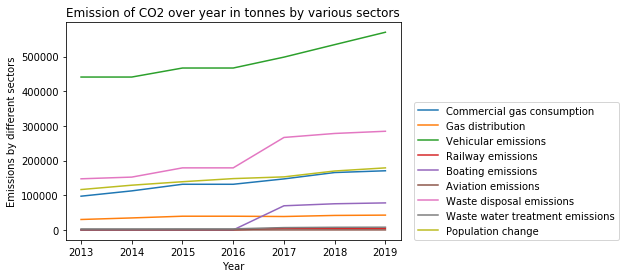

In [9]:
plt.plot(dirty_df['year'],dirty_df['Commer_Gas_Consumption_Emission'], label="Commercial gas consumption")
plt.plot(dirty_df['year'],dirty_df['Distribution_of_Gas_Emission'], label='Gas distribution')
plt.plot(dirty_df['year'],dirty_df['Vehicular_Emissions'], label='Vehicular emissions')
plt.plot(dirty_df['year'],dirty_df['Railway_Emissions'], label='Railway emissions')
plt.plot(dirty_df['year'],dirty_df['Boating_Emissions'], label='Boating emissions')
plt.plot(dirty_df['year'],dirty_df['Aviation_Emissions'], label="Aviation emissions")
plt.plot(dirty_df['year'],dirty_df['SolidWaste_Emissions'], label='Waste disposal emissions')
plt.plot(dirty_df['year'],dirty_df['WasteWater_Treatment_Emissions'], label='Waste water treatment emissions')
plt.plot(dirty_df['year'],dirty_df['population'], label="Population change")
#plt.plot(dirty_df['year'],dirty_df['Commer_Gas_Consumption_Emission'])
plt.xlabel("Year")
plt.ylabel("Emissions by different sectors")
plt.title("Emission of CO2 over year in tonnes by various sectors")
plt.legend(loc=(1.04,0))
plt.show()

### Bar graph to show the emissions by vehicles in Melbourne over the years, which is the major contributor to greenhouse gases.

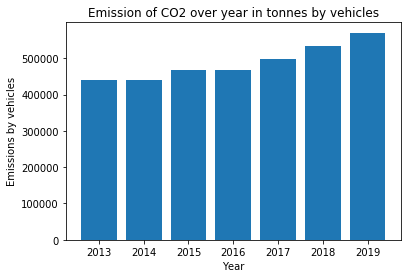

In [10]:
plt.bar(dirty_df['year'],dirty_df['Vehicular_Emissions'])
plt.xlabel("Year")
plt.ylabel("Emissions by vehicles")
plt.title("Emission of CO2 over year in tonnes by vehicles")
plt.show()

## Pie charts to show the contribution of each sector in each of the years.

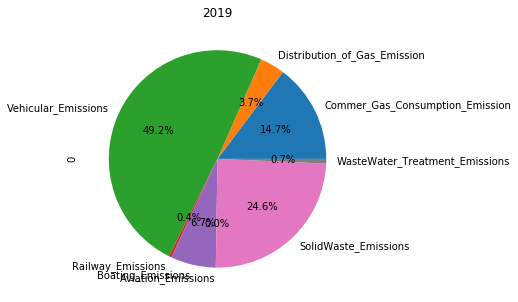

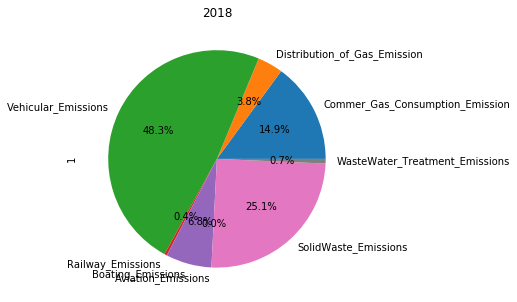

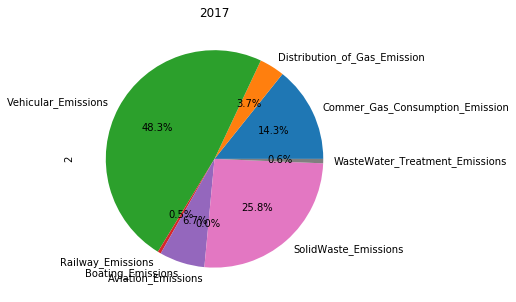

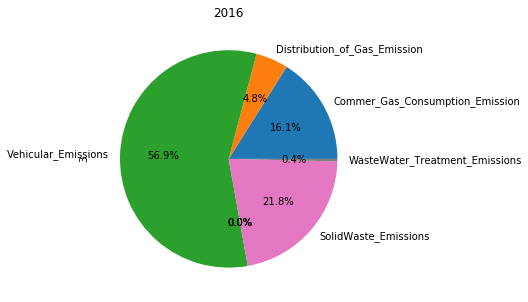

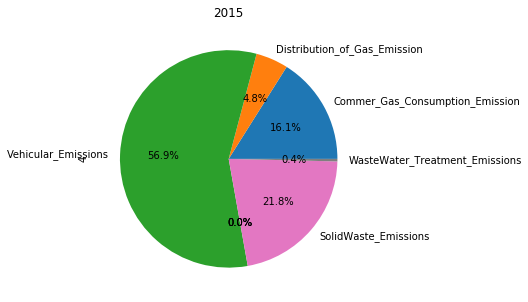

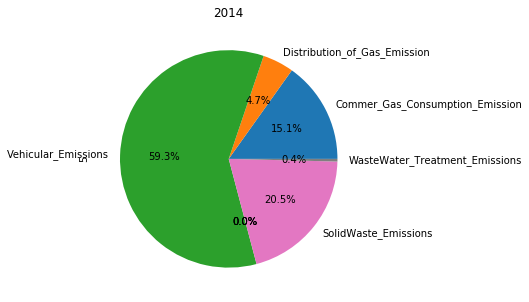

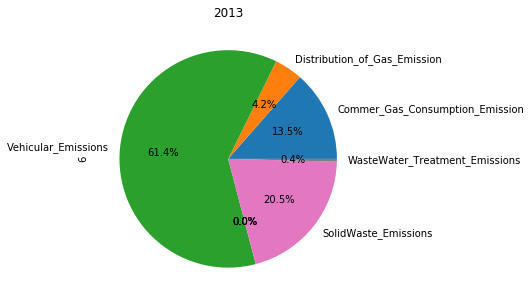

In [11]:
# for loop to plot pie charts for each row in data frame
for i in dirty_df.index:
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    d1 = dirty_df.iloc[i]
    d2 = d1.drop(labels=['year', 'population'])
    d2.plot(kind='pie', ax=ax, autopct='%1.1f%%', title=d1['year'])

## Calculate total CO2 emissions by all sectors for each year and plot the trend.

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


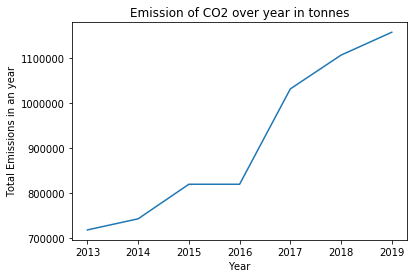

In [12]:
# get the columns and remove unwanted columns
cols = list(dirty_df.columns)
cols.remove('year')
cols.remove('population')
# get the sum and store into a new column
dirty_df['Total_emissions'] = dirty_df[cols].sum(axis=1)

# plot line chart for the calculated column
plt.plot(dirty_df['year'],dirty_df['Total_emissions'])
plt.xlabel("Year")
plt.ylabel("Total Emissions in an year")
plt.title("Emission of CO2 over year in tonnes")
plt.show()

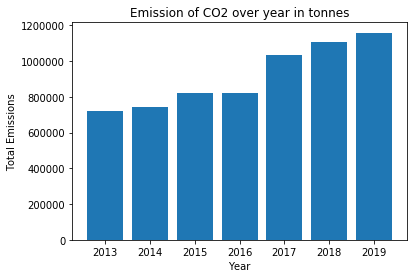

In [13]:
# bar graph for total emissions over the years
plt.bar(dirty_df['year'],dirty_df['Total_emissions'])
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.title("Emission of CO2 over year in tonnes")
plt.show()

In [14]:
# save the dataframe into a csv file
dirty_df.to_csv("Emission data.csv")

# Data set 2: Sea and land temperatures in Australia

In [15]:
# read csv file into dataframe
snl_Temp = pd.read_csv("Sea and land temperatures in australia.csv")
# check data types of columns
snl_Temp.dtypes

Year                                         int64
Surface air temperature                    float64
Surface air temperature 10-year average    float64
Sea-surface temperature                    float64
Sea-surface temperature 10-year average    float64
dtype: object

In [16]:
# filter dataframe to above years 2000
snl_Temp = snl_Temp.loc[snl_Temp['Year']>1999]

### Correlation between year and sea and land temperature

In [17]:
# correlation between different columns
snl_Temp.corr()

,Year,Surface air temperature,Surface air temperature 10-year average,Sea-surface temperature,Sea-surface temperature 10-year average
Year,1.000000,0.379160,0.868445,0.689143,0.845502
Surface air temperature,0.379160,1.000000,0.175953,0.196994,-0.294221
Surface air temperature 10-year average,0.868445,0.175953,1.000000,0.458704,0.784558
Sea-surface temperature,0.689143,0.196994,0.458704,1.000000,0.688601
Sea-surface temperature 10-year average,0.845502,-0.294221,0.784558,0.688601,1.000000


### Graph shows the change in sea surface temperature and land air temperature over the years

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


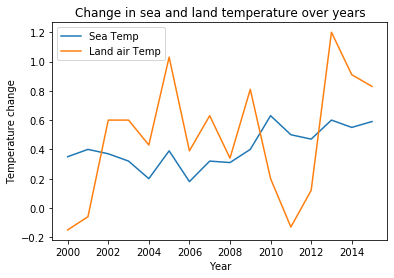

In [18]:
# plot multiple lines on a single graph
plt.plot(snl_Temp['Year'], snl_Temp['Sea-surface temperature '], label="Sea Temp")
plt.plot(snl_Temp['Year'], snl_Temp['Surface air temperature'], label="Land air Temp")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature change")
plt.title("Change in sea and land temperature over years")
plt.show()

### Total emissions affecting sea and land temperatures

Text(0.5, 0.98, 'Increase in sea and land temperature with increase in emissions over year')

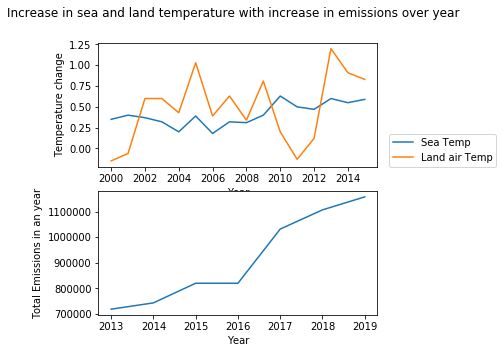

In [19]:
# plotting 2 graphs on different axises
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(5,5)
ax1.plot(snl_Temp['Year'], snl_Temp['Sea-surface temperature '], label="Sea Temp")
ax1.plot(snl_Temp['Year'], snl_Temp['Surface air temperature'], label="Land air Temp")
ax1.legend(loc=(1.04,0))
ax1.set(xlabel = "Year", ylabel = "Temperature change")
ax2.plot(dirty_df['year'],dirty_df['Total_emissions'], label = "Emissions")
ax2.set(xlabel = "Year", ylabel = "Total Emissions in an year")
fig.suptitle('Increase in sea and land temperature with increase in emissions over year')

In [20]:
# filter few columns and save the dataframe to csv
snl_Temp = snl_Temp[['Year','Sea-surface temperature ', 'Surface air temperature']]
snl_Temp.to_csv("Sea and Land Temp data.csv")

# Data set 3: Avg Rainfall and Temperature Data
Both the data sets is limited to years between 1999 and 2021 and avg for the year is calculated for each row. The average is then plotted using scatter plot against year and ploynomial fit is applied to get the trend line plotted. The trend line suggests that the weathers conditions are becoming extreme over the years with increase in temperature and rainfall.

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


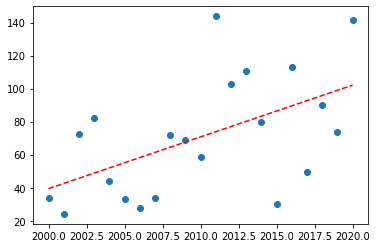

In [21]:
# read data set in dataframe and filter to between years 1999 and 2021
Avg_Rain = pd.read_csv("Average rainfall melbourne.csv")
Avg_Rain = Avg_Rain.loc[Avg_Rain['Year']>1999]
Avg_Rain = Avg_Rain.loc[Avg_Rain['Year'] < 2021]
Avg_Rain = Avg_Rain.fillna(0)

# get the column names and calculate the average and store into a new column
cols1 = list(Avg_Rain.columns)
cols1.remove('Product code')
cols1.remove('Station Number')
cols1.remove('Year')
Avg_Rain["Avg_rain"] = round((Avg_Rain[cols1].sum(axis=1))/12,2)
Avg_Rain = Avg_Rain.reset_index()

# plot scatter plot and plot the trend line using polynomial fit.
plt.scatter(Avg_Rain['Year'], Avg_Rain['Avg_rain'])
z = np.polyfit(Avg_Rain['Year'], Avg_Rain['Avg_rain'], 1)
p = np.poly1d(z)
plt.plot(Avg_Rain['Year'],p(Avg_Rain['Year']),"r--")
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


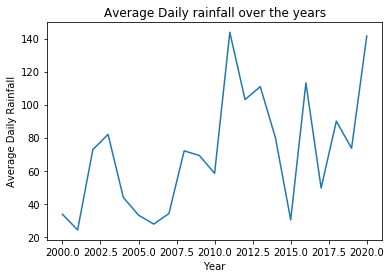

In [22]:
# Line plot to show the average rainfall over years
plt.plot(Avg_Rain['Year'],Avg_Rain['Avg_rain'], label="Sea Temp")
plt.xlabel("Year")
plt.ylabel("Average Daily Rainfall")
plt.title("Average Daily rainfall over the years")
plt.show()

In [23]:
# read data set in dataframe and filter to between years 1999 and 2021
Avg_Temp = pd.read_csv("Max temperature melbourne.csv")
Avg_Temp = Avg_Temp.loc[Avg_Temp['Year']>1999]
Avg_Temp = Avg_Temp.loc[Avg_Temp['Year'] < 2021]
Avg_Temp = Avg_Temp.fillna(0)

# get the column names and calculate the average and store into a new column
cols1 = list(Avg_Temp.columns)
cols1.remove('Product code')
cols1.remove('Station Number')
cols1.remove('Year')
Avg_Temp["Avg_Temp"] = round((Avg_Temp[cols1].sum(axis=1))/12,2)
Avg_Temp = Avg_Temp.reset_index()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


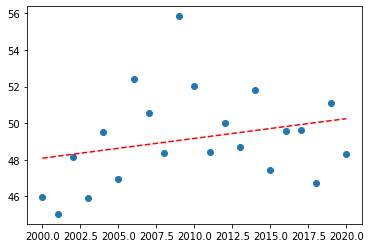

In [24]:
# plot scatter plot and plot the trend line using polynomial fit.
plt.scatter(Avg_Temp['Year'], Avg_Temp['Avg_Temp'])
z = np.polyfit(Avg_Temp['Year'], Avg_Temp['Avg_Temp'], 1)
p = np.poly1d(z)
plt.plot(Avg_Temp['Year'],p(Avg_Temp['Year']),"r--")
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


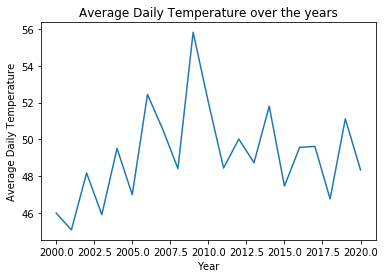

In [25]:
# Line plot to show the average temperature over years
plt.plot(Avg_Temp['Year'], Avg_Temp['Avg_Temp'], label="Sea Temp")
plt.xlabel("Year")
plt.ylabel("Average Daily Temperature")
plt.title("Average Daily Temperature over the years")
plt.show()

In [26]:
# merging rainfall and temperature data sets into one
Rain_Temp = Avg_Rain[['Year', 'Avg_rain']]
Rain_Temp["Avg_Temp"] = Avg_Temp[['Avg_Temp']]
# save the data set to csv file
Rain_Temp.to_csv('Rainfall and Temperature data.csv')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
